<a href="https://colab.research.google.com/github/pachterlab/synchromesh/blob/main/data/angelidis_2019/overdispersion_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# angelidis_2019 dataset

In [2]:
# Installs
!pip install anndata

In [3]:
# Imports
import matplotlib
import matplotlib.pyplot as plt
import anndata
from scipy.optimize import curve_fit
import numpy as np
import os
import json

# config
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [4]:
# Read matrix
!gunzip raw.mtx.gz
adata = anndata.read_mtx('raw.mtx')
matrix = adata.X.todense()
matrix

matrix([[105.,   8.,   8., ...,   0.,   0.,   0.],
        [ 86.,  11.,   3., ...,   0.,   0.,   0.],
        [ 69.,   4.,   8., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)

### Overdispersion parameter

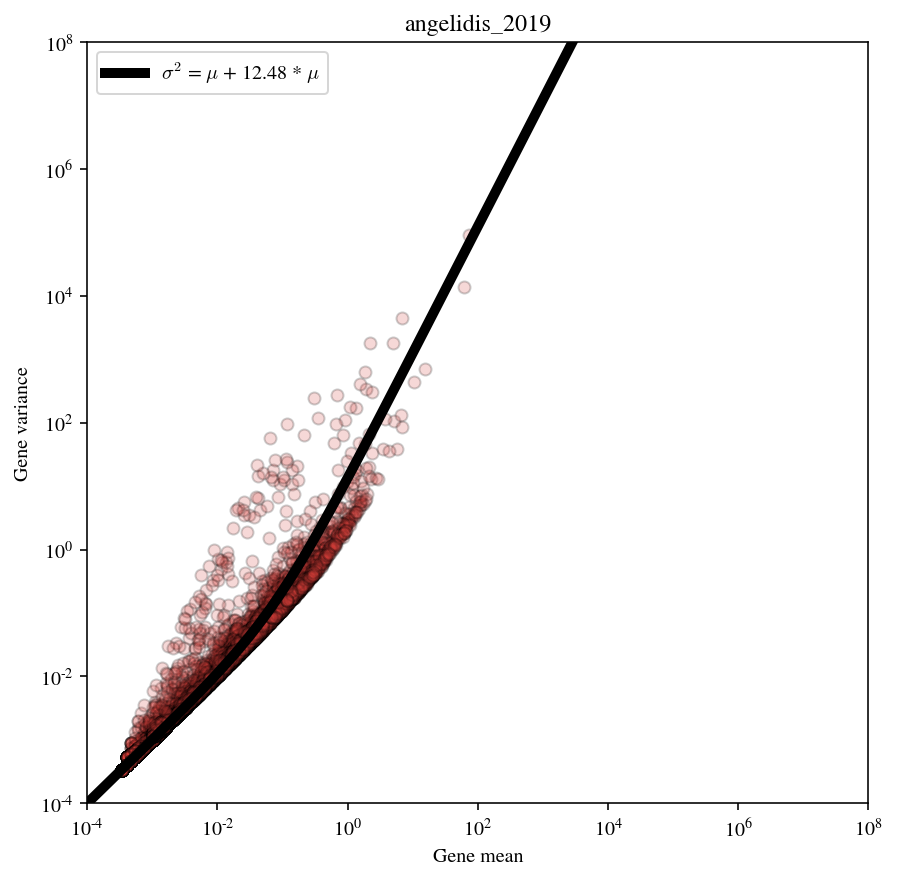

In [18]:
alpha = 0.2
fig, ax = plt.subplots(figsize=(7,7))

def meanvar(x, alpha):
  return x + alpha*x**2

p = {
    "xlabel": "Gene mean",
    "ylabel": "Gene variance",
    "xscale": "log",
    "yscale": "log",
    "ylim": (1e-4, 1e8),
    "xlim": (1e-4, 1e8),
    "title": "angelidis_2019"
}
x = np.array(np.mean(matrix, axis=0)).flatten()
y = np.array(np.var(matrix, axis=0)).flatten()

popt, pcov = curve_fit(meanvar, x, y)

xx = np.logspace(np.log(min(x[x>0])), np.log(max(x)), 100)
yy = meanvar(xx, *popt)
ax.plot(xx,yy, linewidth=5, color='k', label = f"$\sigma^2$ = $\mu$ + {round(popt[0],2)} * $\mu$")
plt.legend(loc="upper left")
ax.scatter(x, y, edgecolor="k", facecolor="#D43F3A", alpha=alpha)



ax.set(**p)
fig.show()
plt.savefig('mean_variance.pdf')

In [19]:
print('The overdispersion parameter for the angelidis_2019 dataset is {:.2f}'.format(popt[0]))

The overdispersion parameter for the angelidis_2019 dataset is 12.48
